# Assignment-02, Probability Model A First Look: An Introduction of Language Model

## Assignment

1. Review the course online programming code; 
2. Review the main questions; 
3. Using wikipedia corpus to build a language model. 

## 1. Review the course online programming code. 

*In this part, you should re-code the programming task in our online course.*

> 
> 

> 
> 





In [1]:
!pwd

/Users/zhao/Documents/NLP-Learning


In [3]:
# 读取数据集合
import pandas as pd
datapath = "/Volumes/Transcend/sqlResult_1558435.csv"
data = pd.read_csv(datapath, encoding='gb18030')
data

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...
5,89612,张怡,中国证券报?中证网,受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",金融股一枝独秀 配置价值犹存,http://www.cs.com.cn/gppd/201706/t20170623_533...
6,89611,NaN,威锋网@http://www.feng.com/,虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""21""...",配骁龙660 全面屏鼻祖夏普新机酝酿中,http://www.cnbeta.com/articles/tech/623603.htm
7,89610,申玉彬 整理,中国证券报?中证网,沙漠雄鹰：震荡有利消化套牢筹码\r\n 周四开盘上证50在银行券商大蓝筹带动下一度涨近...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",博友早评：震荡有利消化套牢筹码,http://www.cs.com.cn/gppd/201706/t20170623_533...
8,89609,李杭_BJS4645,荆楚网-楚天都市报,（原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""1600""...",武汉千余警察出动 抓获808名俊男靓女全是诈骗犯,http://news.163.com/17/0614/14/CMT9N8G80001899...
9,89608,吴瞬,中国证券报?中证网,6月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",纳入MSCI指数 A股长期配置价值提升,http://www.cs.com.cn/gppd/201706/t20170623_533...


In [9]:
# 获取全部的content部分并且用正则表达式去除多余的标点
import re
all_articles = data['content'].tolist()

def token(string):
    return ' '.join(re.findall('[\w|\d]+', string))
test_string = "***&& %%## this is a BIGGGGGGGGG thing BI and BIGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGgg"
token(test_string)

'this is a BIGGGGGGGGG thing BI and BIGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGgg'

In [11]:
# 统计文档中所有的字符量, 将所有文档加到一起
all_articles = [token(str(content)) for content in all_articles]
text = ""
for article in all_articles:
    #print(article)
    text += article
print('length of text: {}'.format(len(text)))

length of text: 37412506


In [13]:
# 定义原始文档
from functools import reduce
TEXT = text

In [14]:
# 将所有文档叠加到一起(方法2)
txt_from_reduce = reduce(lambda a1, a2: a1 + a2, all_articles[:10])
txt_from_reduce

'此外 自本周 6月12日 起 除小米手机6等15款机型外 其余机型已暂停更新发布 含开发版 体验版内测 稳定版暂不受影响 以确保工程师可以集中全部精力进行系统优化工作 有人猜测这也是将精力主要用到MIUI 9的研发之中 MIUI 8去年5月发布 距今已有一年有余 也是时候更新换代了 当然 关于MIUI 9的确切信息 我们还是等待官方消息骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器 高通强调 不会因为只考虑性能而去屏蔽掉小核心 相反 他们正联手微软 找到一种适合桌面平台的 兼顾性能和功耗的完美方案 报道称 微软已经拿到了一些新的源码 以便Windows 10更好地理解big little架构 资料显示 骁龙835作为一款集成了CPU GPU 基带 蓝牙 Wi Fi的SoC 比传统的Wintel方案可以节省至少30 的PCB空间 按计划 今年Q4 华硕 惠普 联想将首发骁龙835 Win10电脑 预计均是二合一形态的产品 当然 高通骁龙只是个开始 未来也许还能见到三星Exynos 联发科 华为麒麟 小米澎湃等进入Windows 10桌面平台此前的一加3T搭载的是3400mAh电池 DashCharge快充规格为5V 4A 至于电池缩水 可能与刘作虎所说 一加手机5要做市面最轻薄大屏旗舰的设定有关 按照目前掌握的资料 一加手机5拥有5 5寸1080P三星AMOLED显示屏 6G 8GB RAM 64GB 128GB ROM 双1600万摄像头 备货量 惊喜 根据京东泄露的信息 一加5起售价是xx99元 应该是在2799 2899 2999中的某个这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车 新华社记者张立云摄原标题 44岁女子跑深圳约会网友被拒 暴雨中裸身奔走 深圳交警微博称 昨日清晨交警发现有一女子赤裸上身 行走在南坪快速上 期间还起了轻生年头 一辅警发现后赶紧为其披上黄衣 并一路劝说她 那么事发时 到底都发生了些什么呢 南都记者带您一起还原现场 南都记者在龙岗大队坂田中队见到了辅警刘青 发现女生的辅警 一位外表高大帅气 说话略带些腼腆的90后青年 刘青介绍 6月16日早上7时36分 他正在环城南路附近值勤 接到中队关于一位女子裸身进入机动车可能有危险的警情 随后骑着小铁骑开始沿路寻找 大概花了十多分钟在南坪大道坂田出口往

In [16]:
# 正则表达式练习
import requests
url = "https://movie.douban.com/"
response = requests.get(url)
response.text

'<!DOCTYPE html>\n<html lang="zh-cmn-Hans" class="">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta name="renderer" content="webkit">\n    <meta name="referrer" content="always">\n    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />\n    <title>\n        豆瓣电影\n</title>\n    \n    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />\n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">\n    \n    <meta http-equiv="mobile-agent" content="format=xhtml; url=http://m.douban.com/movie/">\n    <meta property="qc:admins" content="13753521351564752166375" />\n    \n    \n    <meta name="keywords" content="电影、经典电影、热映、电视剧、美剧、影评、电影院、电影票、排行、推荐"/>\n    <meta name="description" content="豆瓣电影提供最新的电影介绍及评论包括上映影片的影讯查询及购票服务。你可以记录想看、在看和看过的电影电视剧，顺便打分、写影评。根据你的口味，豆瓣电影会推荐好电影给你。" />\n\n    <link rel="apple-touch-icon" href="https://img3.dou

In [28]:
url_pattern = re.compile('https://movie.douban.com/subject/\d+/\?from=showing')
image_pattern = re.compile('https://img3.doubanio.com/view/photo/s_ratio_poster/public/\w\d+.\w+')

In [24]:
url_pattern.findall(response.text)

['https://movie.douban.com/subject/27202819/?from=showing',
 'https://movie.douban.com/subject/27202819/?from=showing',
 'https://movie.douban.com/subject/2244426/?from=showing',
 'https://movie.douban.com/subject/2244426/?from=showing',
 'https://movie.douban.com/subject/30334073/?from=showing',
 'https://movie.douban.com/subject/30334073/?from=showing',
 'https://movie.douban.com/subject/26728669/?from=showing',
 'https://movie.douban.com/subject/26728669/?from=showing',
 'https://movie.douban.com/subject/30164448/?from=showing',
 'https://movie.douban.com/subject/30164448/?from=showing',
 'https://movie.douban.com/subject/25924056/?from=showing',
 'https://movie.douban.com/subject/25924056/?from=showing',
 'https://movie.douban.com/subject/27663742/?from=showing',
 'https://movie.douban.com/subject/27663742/?from=showing',
 'https://movie.douban.com/subject/5300054/?from=showing',
 'https://movie.douban.com/subject/5300054/?from=showing',
 'https://movie.douban.com/subject/27624661/

In [29]:
image_url = image_pattern.findall(response.text)
image_url

['https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551353482.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551249211.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2552522615.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551172384.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549234765.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549558913.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549523952.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549177902.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549910141.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551693460.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2552614343.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2545472803.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poste

In [15]:
# 中文分词
import jieba

def cut(string): return list(jieba.lcut(string))
cut("测试一下")

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/hm/t000krsj6_d1qbw9mt43jnzh0000gn/T/jieba.cache
Loading model cost 1.877 seconds.
Prefix dict has been built succesfully.


['测试', '一下']

In [25]:
# 存储全部的token
# 过滤潜在的空token
all_tokens = cut(TEXT)
valid_tokens = [t for t in all_tokens if t.strip() and t!= 'n']

In [27]:
print(len(all_tokens))
print(len(valid_tokens))

21906852
17221785


In [32]:
valid_tokens[:10]

['此外', '自', '本周', '6', '月', '12', '日', '起', '除', '小米']

In [33]:
# 获取词频
from collections import Counter
words_count = Counter(valid_tokens)
words_count.most_common(10)

[('的', 703820),
 ('在', 264633),
 ('月', 189525),
 ('日', 169920),
 ('新华社', 142462),
 ('和', 134220),
 ('年', 123531),
 ('了', 121904),
 ('是', 100288),
 ('１', 88187)]

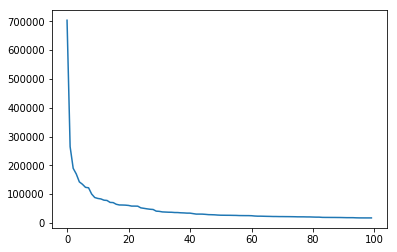

In [34]:
# 打印出来前100个词频的分布
%matplotlib inline
frequences = [f for w, f in words_count.most_common(100)]
x = [i for i in range(len(frequences[:100]))]
plt.plot(x, frequences)

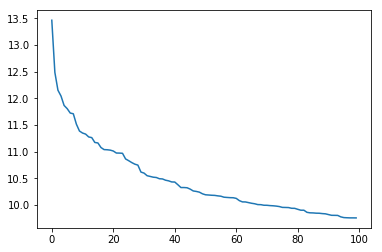

In [35]:
# 转换成log分布
import numpy as np
plt.plot(x, np.log(frequences))

In [36]:
# 获得所有词的词频，用于1-gram中的概率统计
frequences_all = [f for w, f in words_count.most_common()]
frequences_sum = sum(frequences_all)
print("the number of word: {}".format(frequences_sum))

# 获得某一个词的概率
def get_prob(word):
    # 平滑项
    esp = 1 / frequences_sum
    if word in words_count:
        return words_count[word] / frequences_sum
    else:
        return esp
    
def product(numbers):
    return reduce(lambda n1, n2: n1 * n2, numbers)

def language_model_one_gram(string):
    words = cut(string)
    return product([get_prob(word) for word in words])


the number of word: 17221785


In [37]:
print(language_model_one_gram("广交会下个月举行"))
print(language_model_one_gram("长征火箭下周发射"))
print(language_model_one_gram("稀里哗啦我想吃撸串"))


4.8765684381069034e-14
1.4511549339176565e-18
3.766919391736006e-29


In [40]:
sentences = """
这是一个比较正常的句子
这个一个比较罕见的句子
小明毕业于清华大学
小明毕业于秦华大学
""".split()
for sentence in sentences:
    print(sentence, ":", language_model_one_gram(sentence))

这是一个比较正常的句子 : 7.429984647015532e-22
这个一个比较罕见的句子 : 1.7566783516469408e-22
小明毕业于清华大学 : 3.039960976514903e-18
小明毕业于秦华大学 : 5.813337476916057e-24


In [42]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "我去吃火锅，今晚 今晚我去吃火锅"]

for s in need_compared:
    sen1, sen2 = s.split()
    p1, p2 = language_model_one_gram(sen1), language_model_one_gram(sen2)
    
    better = sen1 if p1 > p2 else sen2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(sen1, p1))
    print('-'*4 + ' {} with probility {}'.format(sen2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 6.279484454158278e-50
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 5.1533768284792506e-48
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 2.873219522813593e-25
---- 真是一只好看的小猫 with probility 1.0935351206452033e-21
今晚我去吃火锅 is more possible
---- 我去吃火锅，今晚 with probility 6.876097222574346e-26
---- 今晚我去吃火锅 with probility 1.1841866800627252e-18


In [49]:
# 2-gram
# 获取2-gram组合词
valid_tokens = [str(t) for t in valid_tokens]
all_2_gram_words = [''.join(valid_tokens[i:i+2]) for i in range(len(valid_tokens[:-2]))]
_2_gram_sum = len(all_2_gram_words)
_2_gram_counter = Counter(all_2_gram_words)

# 计算联合概率
def get_combination_prob(w1, w2):
    if w1 + w2 in _2_gram_counter:
        return _2_gram_counter[w1+w2] / _2_gram_sum
    else:
        return 1 / _2_gram_sum

# 计算条件概率
def get_prob_2_gram(w1, w2):
    return get_combination_prob(w1, w2) / get_prob(w1)
 
# 完成2-gram模型
def language_model_two_gram(sentence):
    sentence_probability = 1
    words = cut(sentence)
    for i, word in enumerate(words):
        if i == 0:
            prob = get_prob(word)
        else:
            previous = words[i-1]
            prob = get_prob_2_gram(previous, word)
        sentence_probability *= prob
    return sentence_probability

In [51]:
print(get_combination_prob("去", "北京"))
print(get_combination_prob('苹果', '手机'))
print(get_combination_prob('波音', '飞机'))
print(get_prob_2_gram("去", "沈阳"))

1.8000459069772276e-06
2.6129698649669433e-06
8.129239579897157e-07
0.0006857770649650213


In [55]:
print(language_model_two_gram('小明今天抽奖抽到一台苹果手机'))
print(language_model_two_gram('小明今天抽奖抽到一台波音飞机'))

4.5133725473313174e-18
3.9724842499924055e-18


In [58]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = language_model_two_gram(s1), language_model_two_gram(s2)  
    better = s1 if p1 > p2 else s2    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 6.895905640955031e-28
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 5.516724512764024e-28
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.6570998748154123e-19
---- 真是一只好看的小猫 with probility 3.4765951336188093e-16
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 6.82225584071837e-14
---- 今晚火锅去吃我 with probility 9.986004768787415e-16
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.0579577386518395e-12
---- 养乐多绿来一杯 with probility 5.806600374258542e-08


In [62]:
# 重温第一节课的语句生成
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun belong 
belong => de property
de => 的
property => 眼睛 | 裙子 | 胳膊 | 尾巴
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

import random
def parse_grammer(grammar_str, sep="=>"):
    grammar = {}
    for line in grammar_str.split("\n"):
        line = line.strip()
        if not line: continue
        target, rules = line.split(sep)
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    return grammar

def gene(grammar_parsed, target="sentence"):
    
    if target not in grammar_parsed: return target
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [63]:
g = parse_grammer(grammar)

In [66]:
# 随机生成
random_generated = [gene(g) for _ in range(100)]
sorted(random_generated, key=language_model_two_gram, reverse=True)

['一个女人的眼睛看见这个女人的胳膊',
 '一个女人的裙子看见这个女人的尾巴',
 '一个女人的尾巴坐在一个女人的裙子',
 '一个小猫的裙子看见一个女人的眼睛',
 '这个小猫的裙子看着这个女人的眼睛',
 '一个小猫的裙子坐在一个女人的眼睛',
 '这个桌子的眼睛看着这个桌子的眼睛',
 '一个女人的尾巴看见一个小猫的胳膊',
 '这个女人的胳膊看见这个小猫的胳膊',
 '一个桌子的尾巴看见一个女人的尾巴',
 '一个小猫的眼睛看见一个桌子的眼睛',
 '一个小小的桌子的裙子看见这个女人的胳膊',
 '一个女人的裙子看着这个小小的桌子的尾巴',
 '这个小猫的裙子看着这个小猫的胳膊',
 '一个篮球的尾巴坐在这个女人的眼睛',
 '一个女人的尾巴看见一个篮球的裙子',
 '一个桌子的胳膊听着一个女人的胳膊',
 '一个女人的裙子听着一个篮球的眼睛',
 '一个桌子的胳膊看见这个小小的桌子的眼睛',
 '这个篮球的裙子看见一个小猫的眼睛',
 '这个女人的尾巴坐在一个小猫的尾巴',
 '这个桌子的尾巴看见这个桌子的尾巴',
 '这个女人的裙子坐在这个小猫的裙子',
 '这个小猫的眼睛看见这个小小的女人的胳膊',
 '这个小小的小猫的胳膊看见一个桌子的眼睛',
 '这个桌子的裙子坐在这个小猫的胳膊',
 '一个女人的眼睛听着一个小猫的尾巴',
 '这个篮球的裙子看见这个篮球的胳膊',
 '一个小猫的裙子看见这个篮球的尾巴',
 '一个女人的眼睛听着一个篮球的尾巴',
 '这个篮球的胳膊看见这个小小的女人的裙子',
 '这个女人的尾巴听着这个桌子的尾巴',
 '这个篮球的胳膊坐在一个小猫的裙子',
 '一个小小的桌子的胳膊看着一个桌子的胳膊',
 '这个篮球的胳膊坐在这个桌子的尾巴',
 '一个桌子的眼睛看着一个小猫的裙子',
 '一个小小的桌子的胳膊听着这个小猫的眼睛',
 '这个篮球的眼睛看着这个小小的桌子的裙子',
 '一个桌子的尾巴看着一个篮球的裙子',
 '这个篮球的胳膊坐在这个篮球的尾巴',
 '一个篮球的尾巴听着一个小猫的尾巴',
 '一个小小的小小的女人的尾巴坐在一个小猫的胳膊',
 '这个小小的小小的桌子的眼睛看着这个桌子的尾巴',
 '一个小小的篮球的眼睛看着一个小小的桌子的尾巴',
 '一个小小的篮球的裙子听着一个篮球的尾巴',
 '一个女人的

## 2. Review the main points of this lesson. 

##### 1. How to Github and Why do we use Jupyter and Pycharm; 

**Github**: 可以帮助我们托管项目，利用git项目管理，实现项目的更新、迭代以及回撤，同时方便多人协作变成。另外Github上有大量公开代码，方便学习和使用！<br>
**Jupyter**: 页面版的编译器，非常适合代码调试和页面输出，有一种所见即所得的感觉，同时页面嵌入了多种指令，既可以pip安装包资源，还能显示图像、表格，制作文档等等<br>
**Pycharm**: 非常好用的python编译器。和intellij同属一家公司，代码补全、提示已经调试都非常方便快捷

##### 2. What's the Probability Model?

**Probability Model:**概率模型可分为有参和无参两种，有参的模型是有一组待优化参数，根据输入的数据进行如极大似然估计来更新参数；无参的模型有核方法和近邻法，在一个给定的区域中进行概率估计，判断输入哪一类的概率高，那么就属于这一类别，适用于做聚类

##### 3. Can you came up with some sceneraies at which we could use Probability Model?

比如鉴别文本，垃圾邮件分类、智能问答机器人等等

##### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match? 


在使用基于parse以及模板匹配的方法时，模板毕竟是人为定义，枚举类型有限，而且如果对大规模的语料进行人工处理的话开销非常大，算法的能力和规模会受到严重限制。而如果将文本看作是一系列概率计算的结果，将文本序列看作是一系列随机事件X1:T = <x1, x2... xT>，每个位置上的变量的样本空间是一个给定的词表V，具体使用哪个词可以看作一个随机事件，那么就不会受限于给定的语言规则，直接根据语料间的词汇分布进行学习

##### 5. What's the Language Model;

语言模型可分为统计语言模型和神经网络语言模型。统计语言模型基于传统的统计学模型，如n-gram、TF-IDF权重、词袋模型等等，将文本看作是多个词的概率相乘结果，考虑词之间的影响（TF-IDF和bag-of-word没考虑）；而神经网络语言模型则解决n-gram在n较大时数据稀疏的问题，将词映射到向量空间表示，学习词之间的相邻关系，并将结果用于下游各项任务中，常见的有word2vec、Glove、ELMO、OpenAI GPT以及BERT

#####  6. Can you came up with some sceneraies at which we could use Language Model?

文本分类、摘要生成、情感分类等等

##### 7. What's the 1-gram language model;

将一句话中所有词的出现都当作是一系列独立事件，词之间相互不受影响，按照自己的先验概率计算

##### 8. What's the disadvantages and advantages of 1-gram language model;

缺：忽略了词和词之间的相互影响，比如“火车”、“站”一起出现的概率就比“火车”、“头”出现的概率要高<br>
优：计算词的概率非常简单，句子的生成直接是所有词的先验概率相乘

##### 9.  What't the 2-gram models; 

2-gram模型考虑了相邻词之间的影响，即将句子分词，词语两两组合，计算第二个词在第一个词已经出现的情况下的条件概率，那么整个句子就是由一系列条件概率相乘得到，因为考虑到了相邻词的因素，性能相较于1-gram要好，对超现实的语句有判别能力

##### 10. what's the web crawler, and can you implement a simple crawler? 

网页爬虫是一种爬取技术，可以自动将网页中特定的内容全数摘取下来，对于数据收集和采样非常有帮助。

##### 11.  There may be some issues to make our crwaler programming difficult, what are these, and how do we solve them?

其中一个难点就是正则表达式的设计，以及目标页面的防爬虫...前者只能练练练，后者就随机应变

##### 12. What't the Regular Expression and how to use?

一种匹配目标内容的模板，python可通过re包进行compile，然后对指定url下的内容依照模板爬取数据

## 3. Using Wikipedia dataset to finish the language model. 

Step 1: You need to download the corpus from wikipedis:
> https://dumps.wikimedia.org/zhwiki/20190401/

Step 2: You may need the help of wiki-extractor:

> https://github.com/attardi/wikiextractor

Step 3: Using the technologies and methods to finish the language model; 
> 

Step 4: Try some interested sentence pairs, and check if your model could fit them

> 

Step 5: If we need to solve following problems, how can language model help us? 

+ Voice Recognization.
+ Sogou *pinyin* input.
+ Auto correction in search engine. 
+ Abnormal Detection.

In [33]:
import os
import re
import jieba
from functools import reduce
from tqdm import tqdm

In [67]:
# 读取wiki数据
# 来源： JSON解压后的AB/所有文件
directories = ['/Volumes/Transcend/WikiOutput/AB']
#files = reduce(lambda f1, f2: f1 + f2, [os.listdir(dic) for dic in directories])
files = ['/Volumes/Transcend/WikiOutput/AB/' + file for file in os.listdir(directories[0])]

data_text = []
for file in tqdm(files):
    with open(file,"r",encoding='utf-8') as f:
        data = f.readlines()
        for item in data:
            try:
                data_text.append(eval(item)['text'])
            except ValueError:
                continue


100%|██████████| 100/100 [00:14<00:00,  6.40it/s]


In [75]:
def token(string):
    return ' '.join(re.findall('[\w|\d]+', string))
def cut(string):
    return list(jieba.cut(string))

def get_prob(word):
    if word in word_counter:
        return word_counter[word]/frequents_sum
    else:
        return eps
def product(numbers):
    return reduce(lambda n1,n2: n1*n2, numbers)

In [71]:
all_tokens = [token(str(text)) for text in tqdm(data_text)]
text = ''
for a in tqdm(all_tokens):
    text += a
print('length of text: {}'.format(len(text)))

100%|██████████| 30192/30192 [00:00<00:00, 95541.57it/s]

length of text: 35610212


In [73]:
len(text)

35610212

In [77]:
text[:100]

'萬民福音部 萬民福音部 是羅馬教廷的之一 為天主教會的最高宣教機構 隸屬於教廷國務院 原名傳信部 意為 傳佈信仰聖部 另譯傳道議會 傳道總會 由教宗額我略十五世於1622年成立 負責與天主教會有關的宣'

In [82]:
all_tokens = cut(text)
valid_tokens = [t for t in all_tokens if t.strip() and t != 'n']

In [84]:
from collections import Counter
word_counter = Counter(valid_tokens)
frequents = [f for w, f in word_counter.most_common()]
frequents_sum = sum(frequents)
eps = 1 / frequents_sum

In [85]:
all_2_grams_words = [''.join(valid_tokens[i:i+2]) for i in range(len(valid_tokens[:-2]))]
_2_gram_sum = len(all_2_grams_words)
_2_gram_counter = Counter(all_2_grams_words)

def get_combination_prob(w1,w2):
    if w1+w2 in _2_gram_counter: return _2_gram_counter[w1+w2] / _2_gram_sum
    else:
        return 1/_2_gram_sum

def get_two_gram_prob(w1,w2):
    return get_combination_prob(w1,w2) / get_prob(w1)

def language_two_gram(sentence):
    sentence_probability = 1
    words = cut(sentence)
    for i,word in enumerate(words):
        if i==0:
            prob = get_prob(word)
        else:
            previous = words[i-1]
            prob = get_two_gram_prob(previous, word)
        sentence_probability *= prob
    return sentence_probability

In [105]:
language_two_gram("晚上突然想听维也纳爱乐")

1.1662358436719838e-17

In [107]:
language_two_gram("晚上突然想听郭德纲的相声")

8.621157299928209e-22

### Compared to the previous learned parsing and pattern match problems. What's the advantage and disavantage of Probability Based Methods? 

基于概率的模型可以适用于更多更普遍的句子模式，根据语料本身的信息（条件概率）计算每个词在相应位置出现的概率，还能为给定的句子判断真假；
缺点是会生成语句不通顺、同时如果相邻词关系考虑多的话会增加非常多的计算量

## (Optional)  How to solve *OOV* problem?

If some words are not in our dictionary or corpus. When we using language model, we need to overcome this `out-of-vocabulary`(OOV) problems. There are so many intelligent man to solve this probelm. 

-- 

The first question is: 

**Q1: How did you solve this problem in your programming task?**

最常规的处理是用一个固定值(fixed)代替，或者使用wordnet等等找到相似词，并查找是否相似词存在于词表中

Then, the sencond question is: 

**Q2: Read about the 'Turing-Good Estimator', can explain the main points about this method, and may implement this method in your programming task**

Reference: 
+ https://www.wikiwand.com/en/Good%E2%80%93Turing_frequency_estimation
+ https://github.com/Computing-Intelligence/References/blob/master/NLP/Natural-Language-Processing.pdf, Page-37

> coding in here